In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.api as smt


In [66]:
data=pd.read_csv(r"D:\Sameer\Sameer IMARTICUS\Machine Learning\Time Series\Exam\SBI_Historical_Data.csv")

In [67]:
data

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 07, 2020",190.65,191.45,192.10,189.55,44.82M,-0.16%
1,"Aug 06, 2020",190.95,192.30,194.50,190.25,59.74M,-0.26%
2,"Aug 05, 2020",191.45,192.75,196.85,191.00,68.89M,-0.08%
3,"Aug 04, 2020",191.60,193.35,193.80,190.50,43.87M,-0.34%
4,"Aug 03, 2020",192.25,192.00,194.60,190.05,72.46M,0.42%
...,...,...,...,...,...,...,...
1380,"Jan 07, 2015",300.15,300.00,302.55,295.15,15.05M,0.08%
1381,"Jan 06, 2015",299.90,310.00,311.10,298.70,15.33M,-4.11%
1382,"Jan 05, 2015",312.75,316.25,316.80,312.10,9.14M,-0.79%
1383,"Jan 02, 2015",315.25,314.35,318.30,314.35,9.94M,0.40%


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1385 non-null   object 
 1   Price     1385 non-null   float64
 2   Open      1385 non-null   float64
 3   High      1385 non-null   float64
 4   Low       1385 non-null   float64
 5   Vol.      1385 non-null   object 
 6   Change %  1385 non-null   object 
dtypes: float64(4), object(3)
memory usage: 75.9+ KB


# Q1

In [69]:
#Dimensions of data set
data.shape

(1385, 7)

In [70]:
# Statistical summary
data.describe(percentiles=[0.01,0.02,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.96,0.98,0.99]).T

,count,mean,std,min,1%,2%,5%,10%,25%,50%,75%,90%,95%,96%,98%,99%,max
Price,1385.0,266.274404,45.555277,150.85,158.584,166.820,180.58,189.18,245.65,270.80,296.15,319.64,333.74,337.532,349.864,360.050,372.40
Open,1385.0,266.903213,45.590664,151.95,158.872,167.950,181.65,190.20,245.90,271.15,296.50,319.96,334.94,337.878,350.384,358.828,371.95
High,1385.0,270.343682,45.829745,153.20,163.572,169.936,184.44,193.88,248.80,274.60,300.75,324.48,337.95,343.552,355.464,363.160,373.80
Low,1385.0,262.757906,45.248334,148.25,155.284,163.588,178.02,186.02,242.55,267.40,292.20,315.40,330.77,333.350,344.548,355.390,366.20


In [71]:
data.sort_values('Date',inplace=True)

In [72]:
data

,Date,Price,Open,High,Low,Vol.,Change %
1322,"Apr 01, 2015",273.45,266.65,274.65,263.15,12.38M,2.40%
1075,"Apr 01, 2016",195.65,193.70,197.25,192.00,21.75M,0.72%
333,"Apr 01, 2019",322.75,321.80,327.65,321.05,22.37M,0.62%
86,"Apr 01, 2020",186.55,194.00,194.50,185.25,52.95M,-5.23%
581,"Apr 02, 2018",246.15,251.80,252.00,244.90,14.99M,-1.50%
...,...,...,...,...,...,...,...
953,"Sep 29, 2016",247.25,255.00,256.75,243.50,27.87M,-2.56%
704,"Sep 29, 2017",253.85,254.70,255.50,253.05,10.07M,0.51%
1198,"Sep 30, 2015",237.15,244.85,245.40,235.70,17.01M,-1.96%
952,"Sep 30, 2016",251.25,246.85,252.50,245.80,14.83M,1.62%


In [73]:
data["Date"]=pd.to_datetime(data["Date"])

In [74]:
#checking Missing Values
data.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [75]:
#checking data type
data.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
dtype: object

In [76]:
print('min-',data["Date"].min())
print('max-',data["Date"].max())


min- 2015-01-01 00:00:00
max- 2020-08-07 00:00:00


In [77]:
data = data.set_index('Date')

In [78]:
#keeping date and price columns 
data.drop(['Open','High','Low','Vol.','Change %'],axis=1,inplace=True)

In [79]:
data

,Price
Date,
2015-04-01,273.45
2016-04-01,195.65
2019-04-01,322.75
2020-04-01,186.55
2018-04-02,246.15
...,...
2016-09-29,247.25
2017-09-29,253.85
2015-09-30,237.15


In [80]:
y=data.Price

In [81]:
type(y)

pandas.core.series.Series

In [82]:
train=data['Price'].resample('w').mean()
train

Date
2015-01-04    314.625
2015-01-11    304.170
2015-01-18    310.530
2015-01-25    321.920
2015-02-01    325.150
               ...   
2020-07-12    192.650
2020-07-19    187.400
2020-07-26    193.470
2020-08-02    189.160
2020-08-09    191.380
Freq: W-SUN, Name: Price, Length: 293, dtype: float64

# Q2
# bCheck Stationarity with:
# ADF Test


<AxesSubplot:xlabel='Date'>

<Figure size 1440x576 with 0 Axes>

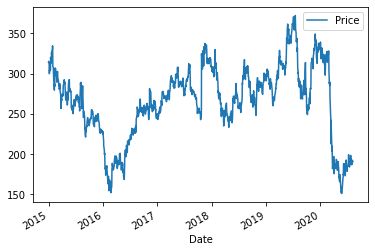

In [83]:
plt.figure(figsize=(20,8))

data.plot()

In [84]:
from statsmodels.tsa.stattools import adfuller

In [85]:
adfuller(train)

(-2.4801407285592534,
 0.12038137232289131,
 1,
 291,
 {'1%': -3.4530232710482367,
  '5%': -2.871523926671883,
  '10%': -2.5720897694878424},
 2072.8686693141253)

In [86]:
adfuller(np.log(train))

(-2.4955176916697797,
 0.11656873141815,
 2,
 290,
 {'1%': -3.453102162983312,
  '5%': -2.871558538275452,
  '10%': -2.5721082282996433},
 -988.7920798885903)

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose  # Decomposition

In [88]:
decompose = seasonal_decompose(train, model='multiplicative', two_sided=False, extrapolate_trend=4)

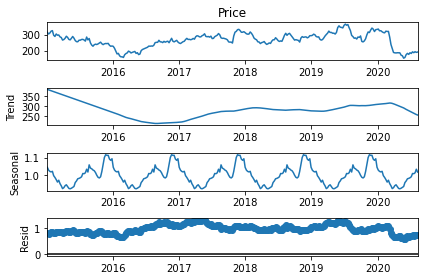

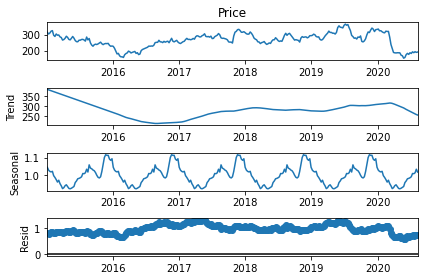

In [89]:
decompose.plot()

In [90]:
pd.DataFrame([decompose.seasonal, decompose.trend, decompose.resid, decompose.observed]).T

,seasonal,trend,resid,Price
Date,,,,
2015-01-04,1.043082,382.099080,0.789403,314.625
2015-01-11,1.026566,379.888186,0.779963,304.170
2015-01-18,1.019122,377.677292,0.806783,310.530
2015-01-25,1.016217,375.466397,0.843705,321.920
2015-02-01,1.019660,373.255503,0.854323,325.150
...,...,...,...,...
2020-07-12,1.007053,266.320946,0.718309,192.650
2020-07-19,1.005820,263.028638,0.708348,187.400
2020-07-26,1.011126,259.896619,0.736220,193.470


In [91]:
train.tail(10)

Date
2020-06-07    175.41
2020-06-14    183.05
2020-06-21    176.74
2020-06-28    186.92
2020-07-05    182.53
2020-07-12    192.65
2020-07-19    187.40
2020-07-26    193.47
2020-08-02    189.16
2020-08-09    191.38
Freq: W-SUN, Name: Price, dtype: float64

In [92]:
train_1 = train[:'2020-03-29']
test = train['2020-03-22':]

In [93]:
train_1

Date
2015-01-04    314.6250
2015-01-11    304.1700
2015-01-18    310.5300
2015-01-25    321.9200
2015-02-01    325.1500
                ...   
2020-03-01    320.5800
2020-03-08    284.3100
2020-03-15    238.2875
2020-03-22    213.4400
2020-03-29    188.6800
Freq: W-SUN, Name: Price, Length: 274, dtype: float64

In [94]:
test

Date
2020-03-22    213.440000
2020-03-29    188.680000
2020-04-05    186.450000
2020-04-12    185.716667
2020-04-19    186.900000
2020-04-26    186.480000
2020-05-03    186.450000
2020-05-10    171.550000
2020-05-17    168.160000
2020-05-24    152.860000
2020-05-31    157.375000
2020-06-07    175.410000
2020-06-14    183.050000
2020-06-21    176.740000
2020-06-28    186.920000
2020-07-05    182.530000
2020-07-12    192.650000
2020-07-19    187.400000
2020-07-26    193.470000
2020-08-02    189.160000
2020-08-09    191.380000
Freq: W-SUN, Name: Price, dtype: float64

In [95]:
log_train = np.log(train_1)


In [96]:
log_train

Date
2015-01-04    5.751381
2015-01-11    5.717587
2015-01-18    5.738281
2015-01-25    5.774303
2015-02-01    5.784287
                ...   
2020-03-01    5.770132
2020-03-08    5.650065
2020-03-15    5.473478
2020-03-22    5.363356
2020-03-29    5.240052
Freq: W-SUN, Name: Price, Length: 274, dtype: float64

In [97]:
log_test = np.log(test)

In [98]:
log_test

Date
2020-03-22    5.363356
2020-03-29    5.240052
2020-04-05    5.228163
2020-04-12    5.224222
2020-04-19    5.230574
2020-04-26    5.228324
2020-05-03    5.228163
2020-05-10    5.144875
2020-05-17    5.124916
2020-05-24    5.029522
2020-05-31    5.058631
2020-06-07    5.167126
2020-06-14    5.209759
2020-06-21    5.174680
2020-06-28    5.230681
2020-07-05    5.206915
2020-07-12    5.260875
2020-07-19    5.233245
2020-07-26    5.265122
2020-08-02    5.242593
2020-08-09    5.254261
Freq: W-SUN, Name: Price, dtype: float64

In [99]:
import sys
import itertools
import warnings

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])
    #return best_results

In [100]:
best_results = auto_arima(log_train_1,  p=range(0, 3), d=range(1,5), q=range(0, 3),
                         P=range(0, 2), D=range(0, 2), Q=range(0, 2))

Best SARIMAXNonexNone12 model - AIC:inf


AttributeError: 'NoneType' object has no attribute 'summary'